In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [57]:
df=sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [58]:
df['affairs'].max()

57.5999908

In [59]:
df['affairs'] = (df.affairs>0).astype(int)  #converting into binary features
df.affairs.unique()

array([1, 0])

In [60]:
df['occupation'].unique().max()

6.0

# without One Hot Encoding

In [61]:
X_tn, X_t, y_tn, y_t = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=1)
clf = LogisticRegression()
clf.fit(X_tn,y_tn)
y_res = clf.predict(X_t)
f1_score(y_t, y_res)

0.47765793528505396

------

In [62]:
from sklearn.preprocessing import OneHotEncoder

In [63]:
def OHE(list):
    global df
    l = list[::-1]
    em_l = []
    encoder = OneHotEncoder()
    print(f'Input list: {l}\n')
    print('New column name list:\n')
    for i in l:
        em_l = []
        encoder.fit(df[[i]])
        
        temp = encoder.transform(df[[i]])
        temp = pd.DataFrame(temp.toarray())
        
        
        for j in range(int(df[i].unique().max())):
            em_l.append( i[:4]+'_'+i[-4:]+str(j) )
#             print(i[:5]+'_'+i[-4:]+str(j+1), end=' ')
        
        temp.columns = em_l
        
        df.drop(i,axis = 1, inplace = True)
        df = pd.concat([temp,df],axis = 1)
        
        print('\t',em_l)
        print('')

    
    return df

In [64]:
final_df = OHE(['occupation','occupation_husb'])

Input list: ['occupation_husb', 'occupation']

New column name list:

	 ['occu_husb0', 'occu_husb1', 'occu_husb2', 'occu_husb3', 'occu_husb4', 'occu_husb5']

	 ['occu_tion0', 'occu_tion1', 'occu_tion2', 'occu_tion3', 'occu_tion4', 'occu_tion5']



In [65]:
final_df

,occu_tion0,occu_tion1,occu_tion2,occu_tion3,occu_tion4,occu_tion5,occu_husb0,occu_husb1,occu_husb2,occu_husb3,occu_husb4,occu_husb5,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0,0
6362,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0,0
6363,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0,0
6364,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0,0


In [66]:
final_df.isnull().values.any()

False

In [67]:
df[df['affairs'] == 0].shape, df[df['affairs'] == 1].shape

((4313, 19), (2053, 19))

<AxesSubplot:xlabel='affairs', ylabel='count'>

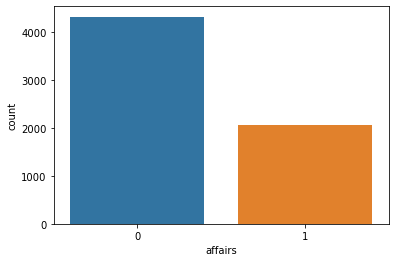

In [68]:
sns.countplot(x = df['affairs'])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,:-1], final_df.iloc[:,-1], test_size=0.2, random_state=1)

In [70]:
X_train.shape, X_test.shape

((5092, 18), (1274, 18))

In [71]:
clf = LogisticRegression(max_iter=5000)

In [72]:
clf.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [73]:
y_pred = clf.predict(X_test)

In [74]:
print(accuracy_score(y_test, y_pred))

0.7401883830455259


In [75]:
confusion_matrix(y_test, y_pred)

array([[782,  90],
       [241, 161]], dtype=int64)

In [76]:
f1_score(y_test, y_pred)

0.49310872894333846

# Handling imbalance data

<AxesSubplot:xlabel='affairs', ylabel='count'>

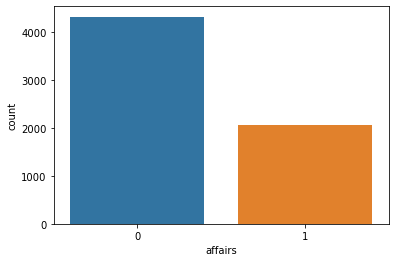

In [77]:
sns.countplot(x = df['affairs'])

In [78]:
df['affairs'].value_counts()

0    4313
1    2053
Name: affairs, dtype: int64

In [79]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 

df_majority = final_df[(final_df['affairs']==0)] 
df_minority = final_df[(final_df['affairs']==1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= df['affairs'].value_counts().max(), # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='affairs', ylabel='count'>

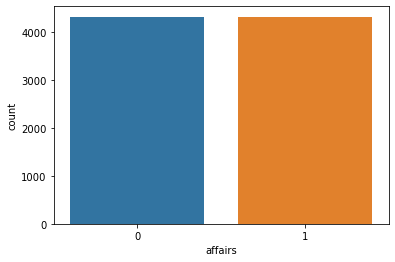

In [80]:
sns.countplot(df_upsampled['affairs'])

In [81]:
df_upsampled['affairs'].value_counts()

1    4313
0    4313
Name: affairs, dtype: int64

In [82]:
df_upsampled

,occu_tion0,occu_tion1,occu_tion2,occu_tion3,occu_tion4,occu_tion5,occu_husb0,occu_husb1,occu_husb2,occu_husb3,occu_husb4,occu_husb5,rate_marriage,age,yrs_married,children,religious,educ,affairs
860,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,37.0,23.0,4.0,2.0,12.0,1
1294,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,42.0,23.0,4.0,3.0,9.0,1
1130,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,42.0,16.5,1.0,2.0,12.0,1
1095,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,27.0,13.0,1.0,2.0,12.0,1
1638,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,32.0,16.5,3.0,3.0,14.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0,0
6362,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0,0
6363,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0,0
6364,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0,0


In [83]:
X_tr, X_tst, y_tr, y_tst = train_test_split(df_upsampled.iloc[:,:-1], df_upsampled.iloc[:,-1], test_size=0.2, random_state=1)

In [84]:
clf.fit(X_tr,y_tr)

y_prd = clf.predict(X_tst)

In [85]:
f1_score(y_tst, y_prd)

0.6896551724137931

In [86]:
confusion_matrix(y_tst, y_prd)

array([[605, 264],
       [267, 590]], dtype=int64)

#### f1 score of imbalanced and balanced data

In [87]:
print('F1 score with imbalanced and without One Hot Encoding the data: ',f1_score(y_t,y_res))
print('F1 score with imbalanced data: ',f1_score(y_test,y_pred))
print('F1 score with balanced data: ',f1_score(y_tst,y_prd))

F1 score with imbalanced and without One Hot Encoding the data:  0.47765793528505396
F1 score with imbalanced data:  0.49310872894333846
F1 score with balanced data:  0.6896551724137931
